In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('ticks',  {'font.family': 'sans-serif'})
sns.set_context("talk")
#deep, muted, pastel, bright, dark, colorblind
sns.set_palette('deep')

current_palette = sns.color_palette()

blue = current_palette[0]
green =current_palette[1]
red = current_palette[2]
purple = current_palette[3]
orange = current_palette[4]
l_blue = current_palette[5]

%matplotlib inline

In [72]:
#chainName = 'chain_virgoDataMembers_32000steps.npy'
chainName = 'chain_continuousMock5_11400steps.npy'

chain = np.load(chainName)
print chain.shape

(11400, 5)


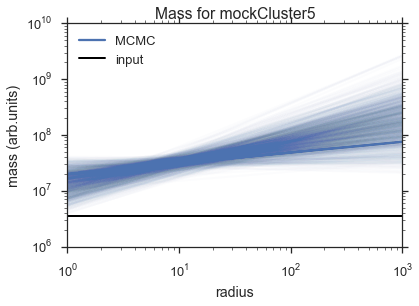

In [73]:
radii = np.logspace(0,3.,20) #radii in kpc

def generateMassProfile(radii,sigma0,m,k,normed=True):
    '''
    For a set of radii calculates a set of enclosed masses in those radii.
    
    INPUTS:
        - radii: a numpy array
        - sigma0: parameter of the velocity dispersion profile
        - m: parameter of the velocity dispersion profile (pwerlaw index)
        - k: power law index of the density profile
        - normed: if True, assumes the input units to be kpc for radii, km/s for sigma0, returns masses in Msun
    
    RETURNS:
        - mass profile in Msun (normed=True) or arbitrary units (normed=False)
    '''
    
    norm = 2.312e5 if normed else 1.
    return -norm*radii*(sigma0*radii**(-m))**2*(-k-2*m)

for i in chain[666:667]:
    plt.plot(radii,generateMassProfile(radii,i[2],i[3],i[1],normed=False),color=blue,label='MCMC')

for i in chain[0:11400:10]:
    plt.plot(radii,generateMassProfile(radii,i[2],i[3],i[1],normed=False),alpha=0.015,color=blue)

plt.plot(radii,generateMassProfile(radii,1000,0.5,2.5,normed=False),'k-',lw=2,label='input')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('radius')
plt.ylabel('mass (arb.units)')
plt.title('Mass for mockCluster5')
#plt.axvline(x=1.2e3,color='k')
plt.legend(loc='upper left')
#plt.text(1.5e3,3e15,'$r_{200}$')

plt.savefig('massMock5_300w.png',dpi=300,bbox_inches='tight',pad_inches=0.2)

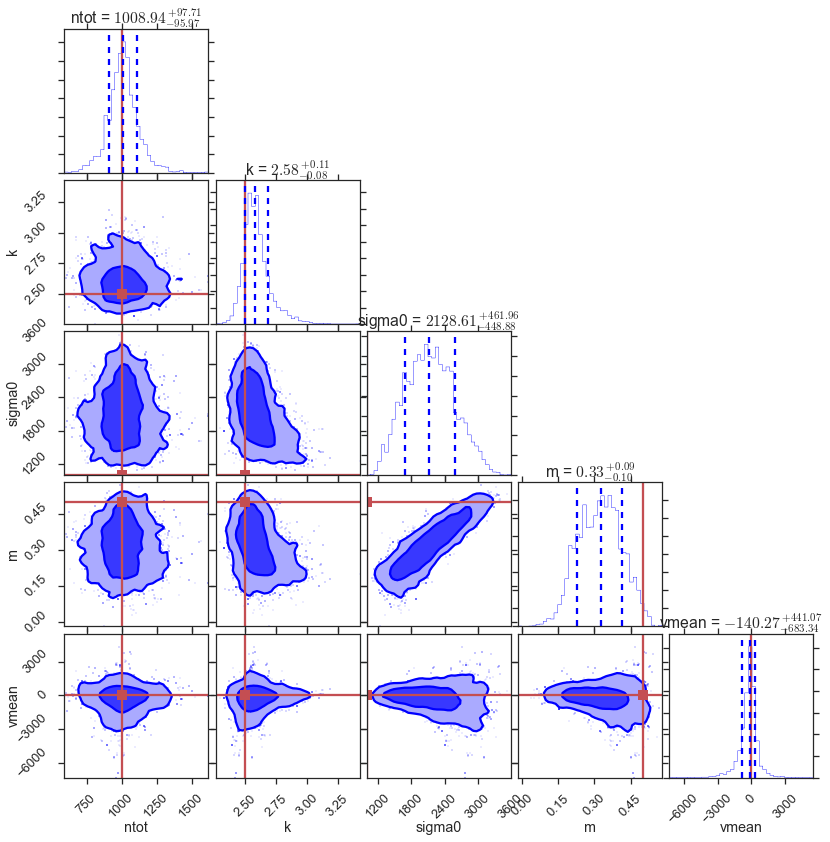

In [75]:
import corner
figure = corner.corner(chain, labels=['ntot','k','sigma0','m','vmean'],quantiles=[0.16,0.5,0.84],
                show_titles=True, title_args={"fontsize": 12},
                plot_datapoints=True, fill_contours=True, levels=[0.68, 0.95], color='b', bins=40, 
                truths=[1000,2.5,1000,0.5,0.],truth_color=red,smooth=1.0);
#figure.gca().annotate("mockCluster1",xy=(0.5,1.0),xycoords="figure fraction")
plt.show()

-174.116316399 320.488320749 356.107811335


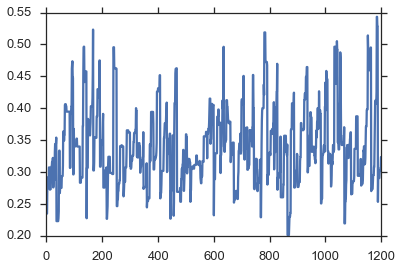

In [58]:
plt.plot(chain[:,3])
bla=np.percentile(chain[:,4],[16,50,84])

print bla[1],bla[1]-bla[0],bla[2]-bla[1]

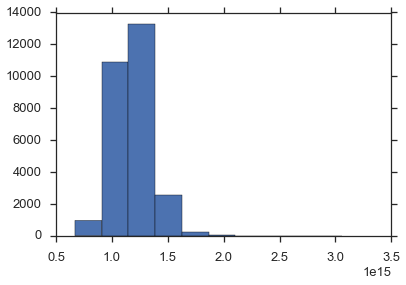

In [46]:
m=np.array([])

for i in chain:
    m=np.append(m,generateMassProfile(7.2e3,i[2],i[3],i[1]))
    
a,b,c = plt.hist(m)

In [47]:
print np.percentile(m,50)
print np.percentile(m,50)-np.percentile(m,16)
print np.percentile(m,84)-np.percentile(m,50)



1.1746545398e+15
1.48504790393e+14
1.62778442205e+14
